<a href="https://colab.research.google.com/github/ayushkumarjr/Credit-Card-Fraud-Detection/blob/main/AnomalyDetection_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Credit Card/creditcard.csv')

In [ ]:
df=data.copy()

In [ ]:
data.isnull().sum().max()

0

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print('No of fraud Class is {} which is {}%'.format(data['Class'].value_counts()[0],round(100*data['Class'].value_counts()[0]/len(df),2)))
print('No of fraud Class is {} which is {}%'.format(data['Class'].value_counts()[1],round(100*data['Class'].value_counts()[1]/len(df),2)))




No of fraud Class is 284315 which is 99.83%
No of fraud Class is 492 which is 0.17%


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

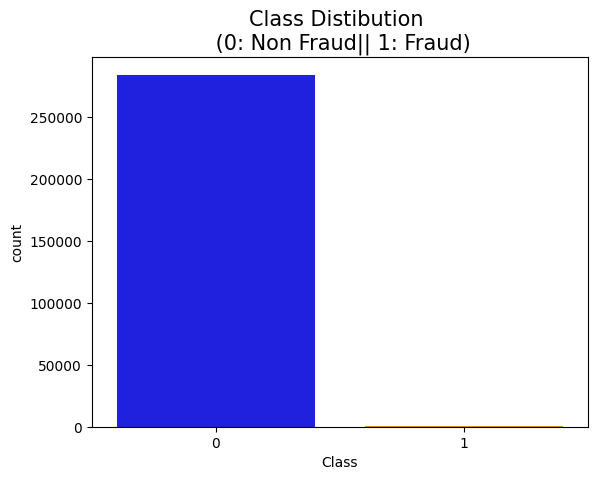

In [ ]:
colors=['#0000FF','#FFA500']

sns.countplot(data=data,x='Class',palette=colors)
plt.title('Class Distibution \n (0: Non Fraud|| 1: Fraud)',fontsize=15)
plt.show()

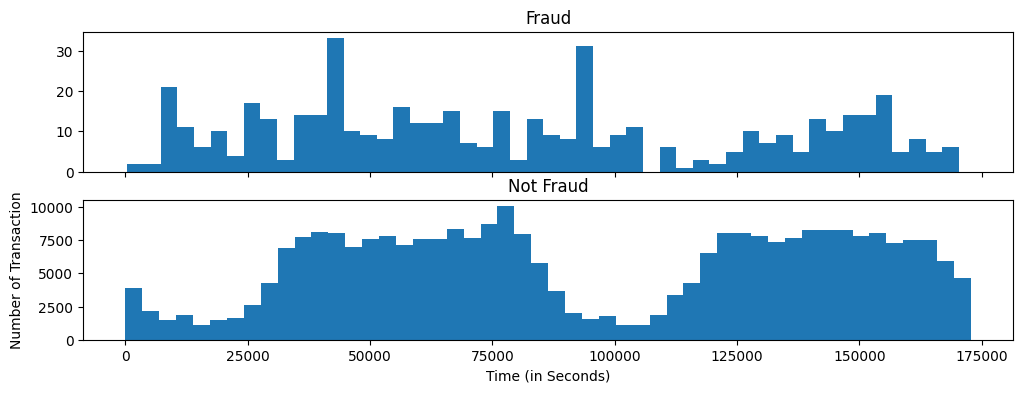

In [ ]:
fig, (ax1,ax2)=plt.subplots(2,1, sharex=True, figsize=(12,4))

ax1.hist(df.Time[df.Class==1],bins=50)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class==0],bins=50)
ax2.set_title('Not Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transaction')
plt.show();

In [ ]:
# Cylindrical Coding
seconds_in_day=24*60*60

df['sin_time']=np.sin(2*np.pi*df.Time/seconds_in_day)
df['cos_time']=np.cos(2*np.pi*df.Time/seconds_in_day)

df.drop('Time',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler=MinMaxScaler(feature_range=(0,1))
df['scaled_amount']=mm_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop('Amount',axis=1,inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# seperating input and output class
X=df.drop('Class',axis=1)
y=df.Class

#setting up testing and training set
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=27)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import average_precision_score

## **First we model data as is**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr=LogisticRegression(solver='liblinear').fit(X_train,Y_train)

#predicting
lr_pred=lr.predict(X_test)

f1=f1_score(Y_test,lr_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,lr_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,lr_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,lr_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,lr_pred)
print('Averge precision:',average_precision)

F1 Score: 0.7466666666666666
Precision Score: 0.9032258064516129
Recall Score: 0.6363636363636364
Accuracy Score: 0.9991994606893064
Averge precision: 0.5754541970179261


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)

rfc_pred=rfc.predict(X_test)
f1=f1_score(Y_test,rfc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,rfc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,rfc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,rfc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,rfc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.879668049792531
Precision Score: 0.9724770642201835
Recall Score: 0.803030303030303
Accuracy Score: 0.999592708069998
Averge precision: 0.7812937098528241


In [ ]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=2).fit(X_train,Y_train)

knc_pred=knc.predict(X_test)
f1=f1_score(Y_test,knc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,knc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,knc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,knc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,knc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.8384279475982532
Precision Score: 0.9896907216494846
Recall Score: 0.7272727272727273
Accuracy Score: 0.9994803516755147
Averge precision: 0.7202806740657091


In [ ]:
# SVM classifier
from sklearn import svm

clf=svm.SVC()

clf.fit(X_train,Y_train)
clf_pred=clf.predict(X_test)
f1=f1_score(Y_test,clf_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,clf_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,clf_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,clf_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,clf_pred)
print('Averge precision:',average_precision)


F1 Score: 0.8260869565217391
Precision Score: 0.9693877551020408
Recall Score: 0.7196969696969697
Accuracy Score: 0.9994382180275835
Averge precision: 0.6981850781327722


In [ ]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(activation='logistic')
mlp.fit(X_train,Y_train)
mlp_pred=mlp.predict(X_test)
f1=f1_score(Y_test,mlp_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,mlp_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,mlp_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,mlp_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,mlp_pred)
print('Averge precision:',average_precision)

F1 Score: 0.8571428571428572
Precision Score: 0.9292035398230089
Recall Score: 0.7954545454545454
Accuracy Score: 0.9995084407741356
Averge precision: 0.7395183822360473


# **Lets try the same classifier using under sampling of the over represented class**

In [ ]:
fraud=df[df['Class']==0]
normal=df[df['Class']==1]

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing
X=df.drop('Class',axis=1)
y=df.Class

In [ ]:
nm=NearMiss()
X_res,y_res=nm.fit_resample(X,y)


In [ ]:
#setting up testing and training set
X_train_us,X_test_us,Y_train_us,Y_test_us=train_test_split(X_res,y_res,test_size=0.25,random_state=27)

# **Applying ML Models**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear').fit(X_train_us,Y_train_us)

#predicting
lr_pred=lr.predict(X_test_us)

f1=f1_score(Y_test_us,lr_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_us,lr_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_us,lr_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_us,lr_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_us,lr_pred)
print('Averge precision:',average_precision)



F1 Score: 0.9565217391304348
Precision Score: 0.9821428571428571
Recall Score: 0.9322033898305084
Accuracy Score: 0.959349593495935
Averge precision: 0.9480772259296443


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10).fit(X_train_us,Y_train_us)

rfc_pred=rfc.predict(X_test_us)
f1=f1_score(Y_test_us,rfc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_us,rfc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_us,rfc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_us,rfc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_us,rfc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9696969696969698
Precision Score: 0.9911504424778761
Recall Score: 0.9491525423728814
Accuracy Score: 0.9715447154471545
Averge precision: 0.9651432062543215


In [ ]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=2).fit(X_train_us,Y_train_us)

knc_pred=knc.predict(X_test_us)
f1=f1_score(Y_test_us,knc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_us,knc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_us,knc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_us,knc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_us,knc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9464285714285715
Precision Score: 1.0
Recall Score: 0.8983050847457628
Accuracy Score: 0.9512195121951219
Averge precision: 0.9470855725506407


In [ ]:
# SVM classifier
from sklearn import svm

clf=svm.SVC()

clf.fit(X_train_us,Y_train_us)
clf_pred=clf.predict(X_test_us)
f1=f1_score(Y_test_us,clf_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_us,clf_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_us,clf_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_us,clf_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_us,clf_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9464285714285715
Precision Score: 1.0
Recall Score: 0.8983050847457628
Accuracy Score: 0.9512195121951219
Averge precision: 0.9470855725506407


In [ ]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(activation='logistic')
mlp.fit(X_train_us,Y_train_us)
mlp_pred=mlp.predict(X_test_us)
f1=f1_score(Y_test_us,mlp_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_us,mlp_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_us,mlp_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_us,mlp_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_us,mlp_pred)
print('Averge precision:',average_precision)

F1 Score: 0.961038961038961
Precision Score: 0.9823008849557522
Recall Score: 0.940677966101695
Accuracy Score: 0.9634146341463414
Averge precision: 0.9524840831129175


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Now trying with oversampling of the under represented Class(non-fraud)**

In [ ]:
X=df.drop('Class',axis=1)
y=df.Class

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(sampling_strategy=0.5)
X_up,y_up=os.fit_resample(X,y)

In [ ]:
#setting up testing and training set
X_train_os,X_test_os,Y_train_os,Y_test_os=train_test_split(X_up,y_up,test_size=0.25,random_state=27)

# **Applying ML Models**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear').fit(X_train_os,Y_train_os)

#predicting
lr_pred=lr.predict(X_test_os)

f1=f1_score(Y_test_os,lr_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_os,lr_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_os,lr_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_os,lr_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_os,lr_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9365665085222281
Precision Score: 0.9742871069948817
Recall Score: 0.9016578324123153
Accuracy Score: 0.9593689620889531
Averge precision: 0.9111885272253426


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10).fit(X_train_os,Y_train_os)

rfc_pred=rfc.predict(X_test_os)
f1=f1_score(Y_test_os,rfc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_os,rfc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_os,rfc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_os,rfc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_os,rfc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9999013292361473
Precision Score: 0.9998026779422128
Recall Score: 1.0
Accuracy Score: 0.9999343450449267
Averge precision: 0.9998026779422128


In [ ]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=2).fit(X_train_os,Y_train_os)

knc_pred=knc.predict(X_test_os)
f1=f1_score(Y_test_os,knc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_os,knc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_os,knc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_os,knc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_os,knc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9997040461124344
Precision Score: 0.9994082673504466
Recall Score: 1.0
Accuracy Score: 0.9998030351347802
Averge precision: 0.9994082673504466


In [ ]:
# SVM classifier
from sklearn import svm

clf=svm.SVC()

clf.fit(X_train_os,Y_train_os)
clf_pred=clf.predict(X_test_os)
f1=f1_score(Y_test_os,clf_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_os,clf_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_os,clf_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_os,clf_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_os,clf_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9651557378232806
Precision Score: 0.9892253500281206
Recall Score: 0.9422296154279914
Accuracy Score: 0.9773677990583204
Averge precision: 0.9512955644064869


In [ ]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(activation='logistic')
mlp.fit(X_train_os,Y_train_os)
mlp_pred=mlp.predict(X_test_os)
f1=f1_score(Y_test_os,mlp_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_os,mlp_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_os,mlp_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_os,mlp_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_os,mlp_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9994364292155095
Precision Score: 0.9988734932972851
Recall Score: 1.0
Accuracy Score: 0.9996248288281528
Averge precision: 0.9988734932972851


# **Let's try with over-sampling the under represented class using SMOTE(Synthetic Minority Over-Sampled Technique Algorithm**

In [ ]:
from imblearn.combine import SMOTETomek


In [ ]:
X=df.drop('Class',axis=1)
y=df.Class

In [ ]:
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [ ]:
#setting up testing and training set
X_train_sm,X_test_sm,Y_train_sm,Y_test_sm=train_test_split(X_res,y_res,test_size=0.25,random_state=27)

# **Applying ML Models**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear').fit(X_train_sm,Y_train_sm)

#predicting
lr_pred=lr.predict(X_test_sm)

f1=f1_score(Y_test_sm,lr_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_sm,lr_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_sm,lr_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_sm,lr_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_sm,lr_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9428830330928993
Precision Score: 0.9736790884999476
Recall Score: 0.9139753211344408
Accuracy Score: 0.9445757537387977
Averge precision: 0.9329763820973505


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10).fit(X_train_sm,Y_train_sm)

rfc_pred=rfc.predict(X_test_sm)
f1=f1_score(Y_test_sm,rfc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_sm,rfc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_sm,rfc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_sm,rfc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_sm,rfc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9999367608929361
Precision Score: 0.9998735297837359
Recall Score: 1.0
Accuracy Score: 0.9999366901616511
Averge precision: 0.9998735297837359


In [ ]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=2).fit(X_train_sm,Y_train_sm)

knc_pred=knc.predict(X_test_sm)
f1=f1_score(Y_test_sm,knc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_sm,knc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_sm,knc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_sm,knc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_sm,knc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9996768619076387
Precision Score: 0.9993539325842696
Recall Score: 1.0
Accuracy Score: 0.9996764163817724
Averge precision: 0.9993539325842696


In [ ]:
# SVM classifier
from sklearn import svm

clf=svm.SVC()

clf.fit(X_train_sm,Y_train_sm)
clf_pred=clf.predict(X_test_sm)
f1=f1_score(Y_test_sm,clf_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_sm,clf_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_sm,clf_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_sm,clf_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_sm,clf_pred)
print('Averge precision:',average_precision)

F1 Score: 0.9803769432610105
Precision Score: 0.9840975388711094
Recall Score: 0.9766843747364871
Accuracy Score: 0.9804302255237131
Averge precision: 0.9728228029676886


In [ ]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(activation='logistic')
mlp.fit(X_train_sm,Y_train_sm)
mlp_pred=mlp.predict(X_test_os)
f1=f1_score(Y_test_sm,mlp_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test_sm,mlp_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test_sm,mlp_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test_sm,mlp_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test_sm,mlp_pred)
print('Averge precision:',average_precision)